# **Prediction of breast cancer using machine learning**

# **Introduction**

**Breast Cancer** is a desease in which cells inside the breast grow out of control. Basically, a breast is made up of three main parts which are lobules, ducts, and connective tissues. Most breast cancer occurs in ducts or lobules. There are many types of breast cancer but the common one are invasive ductal carcinoma and invasive lobular carcinoma. 

According to International Agency for Reaserch on Cancer in December 2021, the chance of getting breast cancer is now higher than lung cancer among women worldwide. The rate of getting cancer is one out of five person during their lifetime and more than one in six deaths is caused by cancer. Projections suggest that the number of people being diagnosed with cancer will increase still further in the coming years, and will be nearly 50% higher in 2040 than in 2021. The authorities need to invest in both cancer solution and prevention.

As technology advances, some of the technologies introduced in the Fourth Industrial Revolution are suitable for implementation in medical practice.For instance, **Big Data** has changed the size of data by analyzing large amount of unstructured, non-organised, and incomplete health care data. It can forecast information and helps in decision making. This can be a big breakthrough in medical field with the goals of increasing the quality of patients care and reduce cost. 

Furthermore, the rise of **Data Mining Algorithm** also plays significant roles in healthcare sector. It can be used for predicting, diagnosis of illness, and making decision on saving somebody else lives. There are some machines learning algorithms for prediction used in this breast cancer model to show the comparison between Random Forest, Support Vector Machine (SVM), and Perceptron algorithms. The aims of this model is to predict and diagnose breast cancer using the best algorithms, to find out the most effective based on the performance of each classifiers. 

Steps: 

1. Import Necessary Libraries 
2. Read In and Explore the Data 
3. Data Analysis 
4. Data Cleaning
5. Data Visualization
6. Choosing the Best Model 
7. Discussion 
8. Conclusion



# **Problem Statement**

Every year the number of deaths caused by breast cancer is increasing at an alarming rate. The development for prediction and prevention of cancer is crucial to maintain a healthy lifestyle. Consequently, high accuracy of breast cancer prediction is needed to increase the survivability of cancer patients. Machine learning algorithms can contribute significantly to the prediction and early diagnosis of breast cancer. In this model, it uses Random Forest, Support Vector Machine (SVM), and Perceptron algorithms on breast cancer dataset, comparison will be made after obtaining the results to find out the best and suitable classifiers. All the work will be done using python programming language and Scikit-learn library.  

# **1. Import Necessary Libraries**

Firstly, we need to import necessary libraries such as pandas, numpy, seaborn and scikit-learn.

In [ ]:
import numpy as np
import numpy.random as npr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn import svm
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

# **2. Read in and Explore the Data**

Then, we uploaded the dataset: breast_cancer.csv and it will read in our training and testing data using pd.read_csv  

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('breast_cancer.csv')
df

Saving breast_cancer.csv to breast_cancer.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Dataset: Dataset of breast cancer
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Attribute Information:

Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

*   radius (mean of distances from center to points on the perimeter)
*   texture (standard deviation of gray-scale values)
*   perimeter
*   area
*   smoothness(local variation in radius lengths)
*   compactness (perimeter^2 / area - 1.0)
*  concavity (severity of concave portions of the contour)
*  concave points (number of concave portions of the contour)
*   symmetry
*   fractal dimension ("coastline approximation" - 1)








# **3. Data Analysis**

 The describe function, df() is used for the training data 

In [ ]:
# describe the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
#show the first 5 rows of data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# return all the columns with null values count
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# return the size of dataset
df.shape

(569, 33)

# **4. Data Cleaning**

We need to clean the data in order for it to be trained more accurately with the machine learning models. From the data analysis, we have found that one of the columns, 'unnamed: 32' contains null values. Another column, 'id' does not have any impact on the outcome of the data (diagnosis). Hence, we need to remove the two columns, 'unnamed:32' and 'id'.

In [ ]:
# remove the column with null values and the ID column
df.drop(["Unnamed: 32","id"], axis=1, inplace=True)

We check the number of columns left in the dataset after we dropped the two columns.

In [ ]:
# shape of dataset after removal of columns
df.shape

(569, 31)

Now, we are left with 31 columns of data, with the same number of rows, which is 569.

We change the data type of the outcome ('diagnosis') from string to integer for when we train and test the dataset. In 'diagnosis', the label M is changed to 1, while B is changed to 0. This represents the malignant cancer cells, where breast cancer is true (1), and benign cancer cells, where breast cancer is false (0).

In [ ]:
# Change label M(malignant) = 1 dan B(benign) = 0
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

In [ ]:
#Get the count of malignant(M=1) and Benign(B=0) cells
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

We find that in this dataset, 357 patients do not have breast cancer while 212 people have breast cancer.

In [ ]:
#Identify the data types of each column
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

We observe that the datatypes for each column except 'diagnosis' are float64, which implies that they are continuous variables. The column 'diagnosis' is the datatype int64, which implies it is a discrete variable.

# **5. Data Visualization**

From the 31 columns, we know that 'diagnosis' is the outcome, and therefore our target. The remaining 30 columns are the features, whose data used to predict our target.

We also split the dataset of 569 rows into two sets. The training set is made up of 75% of the entire dataset while the test set is made up of the remaining 25%.

In [ ]:
#features
x = df.iloc[:, 1:]
#target
y = df['diagnosis'].tolist()
print(x)

# Split dataset into test set (25%) and train set (75%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

     radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


We confirm that there are 569 rows of data, and that there are 30 columns for the features, from 'radius_mean' to 'fractal_dimension_worst'.

In [ ]:
x_train.shape, x_test.shape

((426, 30), (143, 30))

Here, we see that the train set is made up of 30 columns and 426 rows. The test set is made up of 30 columns and 143 rows.

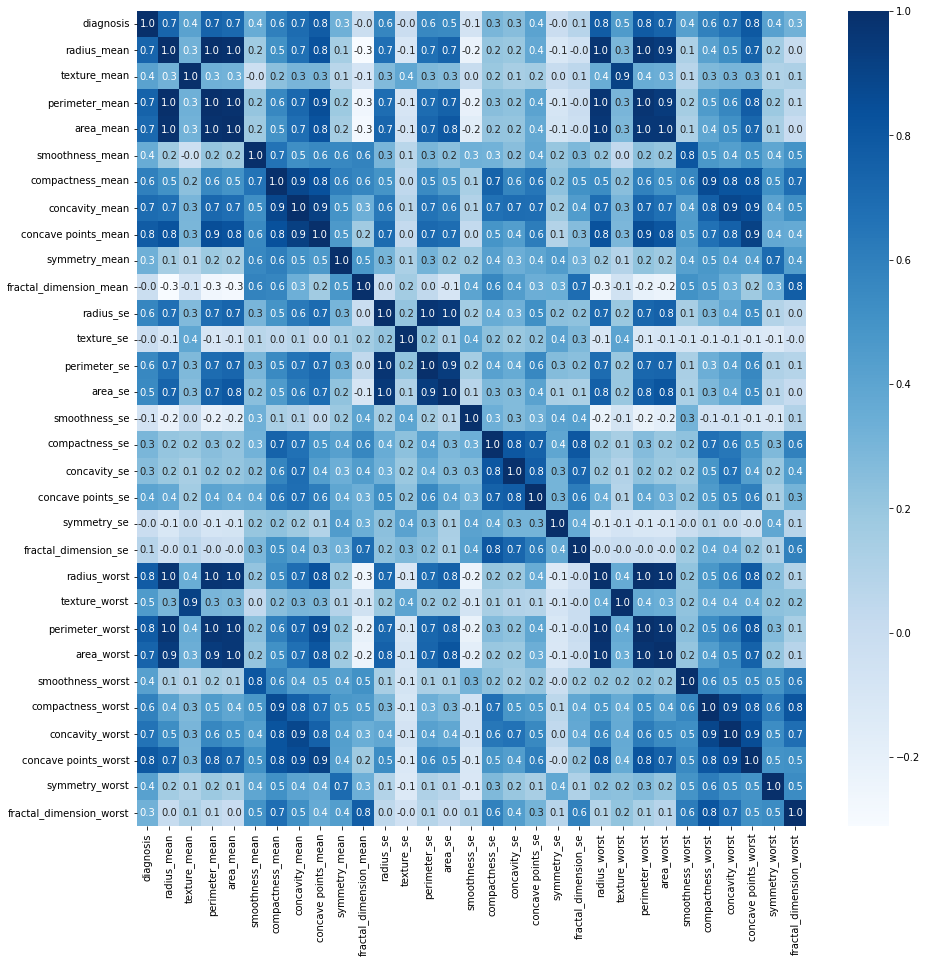

In [ ]:
#Plot heatmap of the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

Features with the highest correlation according to the heatmap are 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se' and 'fractal_dimension_se'.

# **6. Choosing the best model**
We choose 3 machine learning models to test with our dataset. They are supervised learning and classification algorithms, which is suitable to the issue of predicting breast cancer. 

Supervised learning uses a training set to teach models to yield the desired output. Classification uses an algorithm to accurately assign test data into specific categories, where in this case, is assigning malignant (1) and benign (0) cancer cells to each patient.

We will be testing the following models with our training data:


* Random Forest Classifier
* SVM Algorithm
* Perceptron Algorithm

**Model 1: Random Forest**

In [ ]:
# Create a RandomForestClassifier object with the parameters over the data
# n_estimators (default=100) = the number of trees in the forest.
# max_depth (default=None) = the maximum depth of the tree.
model_rf = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=0)

# Train the Random Forest algorithm
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=500, random_state=0)

In [ ]:
# Apply the trained perceptron to make prediction of test data
y_pred1 = model_rf.predict(x_test)

In [ ]:
# Actual and predicted classes
lst_actual_class1 = y_test
lst_predicted_class1 = y_pred1

# label M(ganas = malignant) = 1 dan B(jinak = benign) = 0
lst_classes1 = [0, 1]

# Compute binary-class confusion matrix 
tn1, fp1, fn1, tp1 = confusion_matrix(lst_actual_class1, lst_predicted_class1, labels=lst_classes1).ravel()
sensitivity1 = round(tp1/(tp1+fn1)*100, 4);
specificity1 = round(tn1/(tn1+fp1)*100, 4);
accuracy1 = round((tp1+tn1)/(tp1+fp1+tn1+fn1)*100, 4);
balanced_accuracy1 = round(((sensitivity1+specificity1)/2),4)
precision1 = round(tp1/(tp1+fp1), 4)*100;
f1Score1 = round((2*tp1/(2*tp1 + fp1 + fn1))*100, 4);
mcc1 = round(((tp1*tn1)-(fp1*fn1))/(math.sqrt((tp1+fp1)*(tp1+fn1)*(tn1+fp1)*(tn1+fn1))), 4);

print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp1, fp1, tn1, fn1));
print("Sensitivity: {0}%".format(sensitivity1));
print("Specificity: {0}%".format(specificity1));
print("Accuracy: {0}%".format(accuracy1));
print("Balanced Accuracy: {0}%".format(balanced_accuracy1));
print("Precision: {0}%".format(precision1));
print("F1-Score: {0}%".format(f1Score1));
print("MCC: {0}".format(mcc1));

TP=51, FP=1, TN=88, FN=3
Sensitivity: 94.4444%
Specificity: 98.8764%
Accuracy: 97.2028%
Balanced Accuracy: 96.6604%
Precision: 98.08%
F1-Score: 96.2264%
MCC: 0.9405


 
*   51 patients were predicted to have breast cancer, the prediction was CORRECT. (True positive)
*   88 patients were predicted to NOT have breast cancer, the prediction was CORRECT. (True negative)
* 1 patient was predicted to have breast cancer, the prediction was WRONG. (False positive)
* 3 patients were predicted to NOT have breast cancer, the prediction was WRONG. (False negative)


We find that the accuracy of the Random Forest model to be 97.20%.

**Model 2: SVM Algorithm**

In [ ]:
model_svm = svm.SVC(C=10, kernel='linear', gamma=0.0001)

# Train the svm algorithm
model_svm.fit(x_train, y_train)

SVC(C=10, gamma=0.0001, kernel='linear')

In [ ]:
# Apply the trained svm to make prediction of test data
y_pred2 = model_svm.predict(x_test)

In [ ]:
# Actual and predicted classes
lst_actual_class2 = y_test
lst_predicted_class2 = y_pred2

# label M(ganas = malignant) = 1 dan B(jinak = benign) = 0
lst_classes2 = [0, 1]

# Compute binary-class confusion matrix 
tn2, fp2, fn2, tp2 = confusion_matrix(lst_actual_class2, lst_predicted_class2, labels=lst_classes2).ravel()
sensitivity2 = round(tp2/(tp2+fn2)*100, 4);
specificity2 = round(tn2/(tn2+fp2)*100, 4);
accuracy2 = round((tp2+tn2)/(tp2+fp2+tn2+fn2)*100, 4);
balanced_accuracy2 = round(((sensitivity2+specificity2)/2),4)
precision2 = round(tp2/(tp2+fp2), 4)*100;
f1Score2 = round((2*tp2/(2*tp2 + fp2 + fn2))*100, 4);
mcc2 = round(((tp2*tn2)-(fp2*fn2))/(math.sqrt((tp2+fp2)*(tp2+fn2)*(tn2+fp2)*(tn2+fn2))), 4);

print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp2, fp2, tn2, fn2));
print("Sensitivity: {0}%".format(sensitivity2));
print("Specificity: {0}%".format(specificity2));
print("Accuracy: {0}%".format(accuracy2));
print("Balanced Accuracy: {0}%".format(balanced_accuracy2));
print("Precision: {0}%".format(precision2));
print("F1-Score: {0}%".format(f1Score2));
print("MCC: {0}".format(mcc2));

TP=52, FP=3, TN=86, FN=2
Sensitivity: 96.2963%
Specificity: 96.6292%
Accuracy: 96.5035%
Balanced Accuracy: 96.4628%
Precision: 94.55%
F1-Score: 95.4128%
MCC: 0.926


* 52 patients were predicted to have breast cancer, the prediction was CORRECT. (True positive)
* 86 patients were predicted to NOT have breast cancer, the prediction was CORRECT. (True negative)
* 3 patient was predicted to have breast cancer, the prediction was WRONG. (False positive)
* 2 patients were predicted to NOT have breast cancer, the prediction was WRONG. (False negative)

We find that the accuracy of SVM model to be 96.50%.

**Model 3: Perceptron Algorithm**

In [ ]:
model_per = Perceptron(max_iter=10, eta0=0.1, random_state=0)

model_per.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Perceptron(eta0=0.1, max_iter=10)

In [ ]:
y_pred3 = model_per.predict(x_test)

In [ ]:
lst_actual_class3 = y_test
lst_predicted_class3 = y_pred3

lst_classes3 = [0, 1]

# Compute binary-class confusion matrix 
tn3, fp3, fn3, tp3 = confusion_matrix(lst_actual_class3, lst_predicted_class3, labels=lst_classes3).ravel()
sensitivity3 = round(tp3/(tp3+fn3)*100, 4);
specificity3 = round(tn3/(tn3+fp3)*100, 4);
accuracy3 = round((tp3+tn3)/(tp3+fp3+tn3+fn3)*100, 4);
balanced_accuracy3 = round(((sensitivity3+specificity3)/2),4)
precision3 = round(tp3/(tp3+fp3), 4)*100;
f1Score3 = round((2*tp3/(2*tp3 + fp3 + fn3))*100, 4);
mcc3 = round(((tp3*tn3)-(fp3*fn3))/(math.sqrt((tp3+fp3)*(tp3+fn3)*(tn3+fp3)*(tn3+fn3))), 4);

print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp3, fp3, tn3, fn3));
print("Sensitivity: {0}%".format(sensitivity3));
print("Specificity: {0}%".format(specificity3));
print("Accuracy: {0}%".format(accuracy3));
print("Balanced Accuracy: {0}%".format(balanced_accuracy3));
print("Precision: {0}%".format(precision3));
print("F1-Score: {0}%".format(f1Score3));
print("MCC: {0}".format(mcc3));

TP=40, FP=0, TN=89, FN=14
Sensitivity: 74.0741%
Specificity: 100.0%
Accuracy: 90.2098%
Balanced Accuracy: 87.037%
Precision: 100.0%
F1-Score: 85.1064%
MCC: 0.8


* 40 patients were predicted to have breast cancer, the prediction was CORRECT. (True positive)
* 89 patients were predicted to NOT have breast cancer, the prediction was CORRECT. (True negative)
* 0 patient was predicted to have breast cancer, the prediction was WRONG. (False positive)
* 14 patients were predicted to NOT have breast cancer, the prediction was WRONG. (False negative)

We find that the accuracy of the Perceptron model to be 90.21%.

We tabulate our findings for better visualization and comparison. We take note of the accuracy, and the sensitivity, which shows how many machine-classified positives there are among the actual positives in the dataset.

This is because in this model of prediction of breast cancer, we want to avoid false negatives. Hence, we need to consider the sensitivity when choosing a suitable machine learning model.

In [ ]:
models = pd.DataFrame({
    'Model': [ 'Random Forest', 'SVM','Perceptron'],
    'Accuracy': [accuracy1, accuracy2, accuracy3],
    'Sensitivity': [sensitivity1, sensitivity2, sensitivity3]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Sensitivity
0,Random Forest,97.2028,94.4444
1,SVM,96.5035,96.2963
2,Perceptron,90.2098,74.0741


# **7. Discussion**

## **Comparison Between Models**

Random Forest Classifier, Support Vector Machine (SVM), and Perceptron Algorithms are the examples of machine learning which are suitable for breast cancer prediction. Hence, this section portrays the differences between these three machine learning technique after the test run.


**Random Forest Classifier** refers to the classification algorithm made up of several decision trees. The algorithm uses randomness to build each individual tree to promote uncorrelated forests, which then uses the forest’s predictive powers to make accurate decisions.Random Forest Classifier is one of the best machine learning due to its versatility. It can be used for both regression and classification tasks, and it is also easy to view the relative importance it assigns to the input features. Random forest is also a very handy algorithm because the default hyperparameters it uses often produce a good prediction result. Understanding the hyperparameters is pretty straightforward, and there's also not that many of them. 


**Support Vector Machine (SVM)** is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems.SVM works relatively well when there is a clear margin of separation between classes and more effective in high dimensional spaces. SVM is effective in cases where the number of dimensions is greater than the number of samples.


**Perceptron Algorithms** is a linear machine learning algorithm for binary classification tasks. It may be considered one of the first and the simplest types of artificial neural networks. It is definitely not “deep” learning but is an important building block.


From the results, we can see that Random Forest Classifier has the highest accuracy between all the models up to 97.20 %. Meanwhile, SVM has the second highest accuray and Perceptron is the lowest. 


# **Limitations**

Due to the constraint of the dataset, we are unable to predict the types of breast cancer. Also, oversampling or undersampling of data had not been carried out.



# **8. Conclusion**

In conclusion, the chance of getting breast cancer is increasing constantly over the years. It is an issue that could not be neglect to achieve healthy lifestyle in human. Electronic health record data can help to identify infection patterns and highlight patients at risk before they begin to show symptoms.  Leveraging machine learning and AI tools to drive these analytics can enhance their accuracy and create faster, more accurate alerts for healthcare providers. In this project, a few classification methods are studied and their accuracy are compared, in which Random Forest Classifier gives the highest accuracy (97.20), followed by SVM (96.50), and lastly, Perceptron Algorithms with the lowest accuracy (90.20). It can be concluded that Random Forest Classifier is the best model for this classification task. Future research should be done to improve the dataset to be more comprehensive and effective.